In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../csvki/vlagun_DT_SVM8.csv')

In [3]:
display(df.head())

,Cyanobacteria,Chlorophyceae,Diatomophyceae,picophytoplankton,Diaphanosoma_brachyurum,Acartia_longiremis,Eurytemora_affinis,Cyclops_sp,Basin
0,2.35,3.08,0.230,3.20,0.0001,2.0710,0.9251,0.0001,Eastern
1,6.39,2.87,0.010,2.42,0.0001,0.5014,0.0001,0.0001,Eastern
2,2.05,7.47,0.060,2.61,0.0001,0.0931,0.0001,0.0093,Eastern
3,6.30,5.03,0.110,2.49,0.0001,0.0001,0.0129,0.0060,Eastern
4,3.77,5.69,0.005,1.73,0.0001,0.0001,0.0141,0.0001,Eastern


In [4]:
df.Basin = [1 if i == "Western" else 0 for i in df.Basin]

In [5]:
display(df.head())

,Cyanobacteria,Chlorophyceae,Diatomophyceae,picophytoplankton,Diaphanosoma_brachyurum,Acartia_longiremis,Eurytemora_affinis,Cyclops_sp,Basin
0,2.35,3.08,0.230,3.20,0.0001,2.0710,0.9251,0.0001,0
1,6.39,2.87,0.010,2.42,0.0001,0.5014,0.0001,0.0001,0
2,2.05,7.47,0.060,2.61,0.0001,0.0931,0.0001,0.0093,0
3,6.30,5.03,0.110,2.49,0.0001,0.0001,0.0129,0.0060,0
4,3.77,5.69,0.005,1.73,0.0001,0.0001,0.0141,0.0001,0


In [6]:
X = df.drop("Basin", axis=1)
y = df["Basin"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print('#Training data points: %d' % X_train.shape[0])
print('#Testing data points: %d' % X_test.shape[0])
print('Class:', np.unique(y))

#Training data points: 108
#Testing data points: 47
Class: [0 1]


In [8]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5, random_state=0)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Test dataset Accuracy (tree): %.2f' % ((y_test == y_pred).sum() / y_test.shape[0]))

Misclassified samples: 14
Test dataset Accuracy (tree): 0.70


In [9]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5, random_state=0)

tree.fit(X_train, y_train)

y_pred = tree.predict(X_train)
print('Misclassified samples: %d' % (y_train != y_pred).sum())
print('Train dataset Accuracy (tree): %.2f' % ((y_train == y_pred).sum() / y_train.shape[0]))

Misclassified samples: 28
Train dataset Accuracy (tree): 0.74


In [10]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree,
    out_file='tree.dot',
    feature_names=X.columns.values
)

In [11]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=200,
                                random_state=1,
                                n_jobs=2)

forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, n_jobs=2,
                       random_state=1)

In [12]:
from sklearn.metrics import accuracy_score

y_pred = forest.predict(X_test)
print('Test dataset Accuracy (forest): %.4f' % accuracy_score(y_test, y_pred))

Test dataset Accuracy (forest): 0.7021


In [13]:
y_pred = forest.predict(X_train)
print('Train dataset Accuracy (forest): %.4f' % accuracy_score(y_train, y_pred))

Train dataset Accuracy (forest): 1.0000


In [14]:
import numpy as np
import matplotlib.pyplot as plt 
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 20, 
                            X.columns.values[indices[f]],
                            importances[indices[f]]))

 1) Cyclops_sp           0.202485
 2) Cyanobacteria        0.155161
 3) Chlorophyceae        0.140234
 4) Diatomophyceae       0.132772
 5) picophytoplankton    0.131438
 6) Acartia_longiremis   0.087611
 7) Eurytemora_affinis   0.083678
 8) Diaphanosoma_brachyurum  0.066621


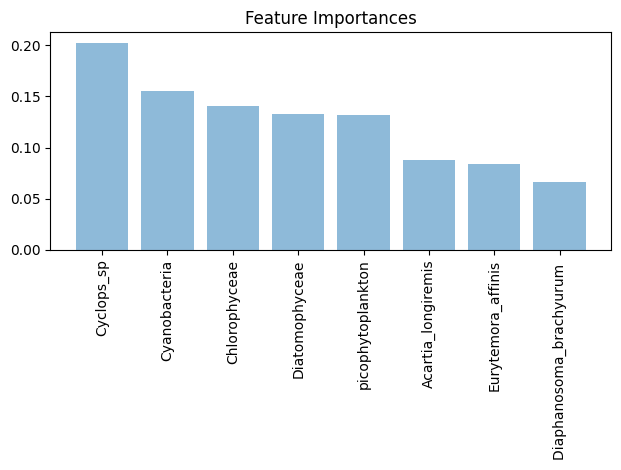

In [15]:
plt.figure()
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center', 
        alpha=0.5)

plt.xticks(range(X_train.shape[1]),
           X.columns.values[indices], rotation=90)
plt.tight_layout()
plt.savefig('C:/Users/sulgard/WBD/fig-forest.png', dpi=300)
plt.show()

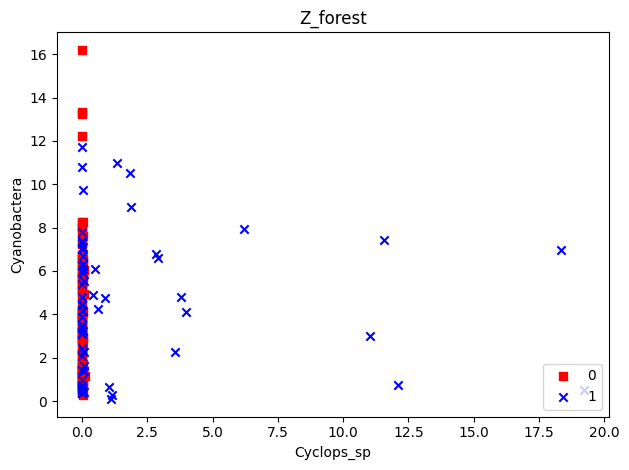

In [16]:
import matplotlib.pyplot as plt

Z_forest = X[['Cyclops_sp', 'Cyanobacteria']].values

colors =  ['r', 'b', 'g', 'k']
makers = ['s', 'x', 'o', '^']

for l, c, m in zip(np.unique(y.values), colors, makers):
    plt.scatter(Z_forest[y.values==l, 0],
                Z_forest[y.values==l, 1],
                c=c, label=l, marker=m)

plt.title('Z_forest')
plt.xlabel('Cyclops_sp')
plt.ylabel('Cyanobactera')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('C:/Users/sulgard/WBD/fig-forest-z.png', dpi=300)
plt.show()

In [17]:
Z_forest_train, Z_forest_test, y_forest_train, y_forest_test = train_test_split(
    Z_forest, y, test_size=0.3, random_state=0)

tree_forest = DecisionTreeClassifier(criterion='entropy',
                                     max_depth=10, min_samples_leaf=5,
                                     random_state=0)
tree_forest.fit(Z_forest_train, y_forest_train)

y_forest_pred = tree_forest.predict(Z_forest_test)
print('Test dataset Accuracy (tree_forest): %.2f' % accuracy_score(y_forest_test, y_forest_pred))

Test dataset Accuracy (tree_forest): 0.70


In [18]:
Z_forest_train, Z_forest_test, y_forest_train, y_forest_test = train_test_split(
    Z_forest, y, test_size=0.3, random_state=0)

tree_forest = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                                     random_state=0)

tree_forest.fit(Z_forest_train, y_forest_train)
y_forest_pred = tree_forest.predict(Z_forest_train)
print('Train dataset Accuracy (tree_forest): %.2f' % accuracy_score(y_forest_train, y_forest_pred))

Train dataset Accuracy (tree_forest): 0.80


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(forest, threshold=0.075, prefit=True)
Z_forest_alt = sfm.transform(X)

for f in range(Z_forest_alt.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            X.columns.values[indices[f]],
                            importances[indices[f]]))

 1) Cyclops_sp                     0.202485
 2) Cyanobacteria                  0.155161
 3) Chlorophyceae                  0.140234
 4) Diatomophyceae                 0.132772
 5) picophytoplankton              0.131438
 6) Acartia_longiremis             0.087611
 7) Eurytemora_affinis             0.083678


C:\Users\sulgard\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [20]:
forest_forest = RandomForestClassifier(criterion='entropy',
                                       n_estimators=200,
                                       random_state=1,
                                       n_jobs=2)
forest_forest.fit(Z_forest_train, y_forest_train)

y_forest_pred = forest_forest.predict(Z_forest_test)
print('Test dataset Accuracy (forest_forest): %.2f' % accuracy_score(y_forest_test, y_forest_pred))

Test dataset Accuracy (forest_forest): 0.55


In [21]:
forest_forest = RandomForestClassifier(criterion='entropy',
                                       n_estimators=200,
                                       random_state=1,
                                       n_jobs=2)
forest_forest.fit(Z_forest_train, y_forest_train)

y_forest_pred = forest_forest.predict(Z_forest_train)
print('Train dataset Accuracy (forest_forest): %.4f' % accuracy_score(y_forest_train, y_forest_pred))

Train dataset Accuracy (forest_forest): 1.0000


In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [28]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[: len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x = X[y == cl, 0],
            y = X[y == cl, 1],
            alpha = 0.8,
            c = [cmap(idx)],
            marker = markers[idx],
            label = cl
        )

    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='c',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set', edgecolors='k')
        

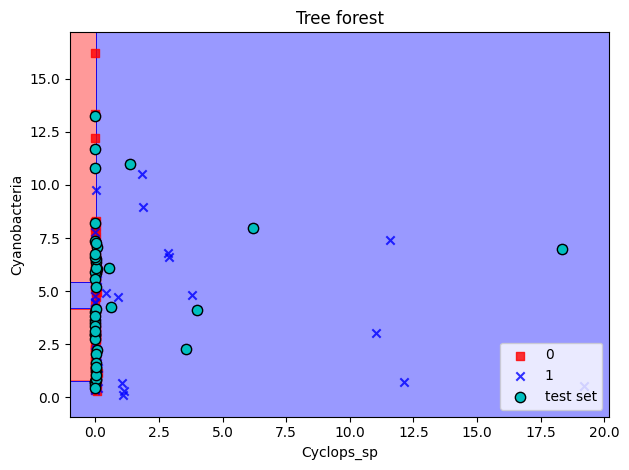

In [29]:
Z_forest_combined = np.vstack((Z_forest_train, Z_forest_test))
y_forest_combined = np.hstack((y_forest_train, y_forest_test))
plot_decision_regions(
    Z_forest_combined,
    y_forest_combined,
    classifier = tree_forest,
    test_idx = range(
        y_forest_train.shape[0],
        y_forest_train.shape[0] + y_forest_test.shape[0]
    )
)

plt.title('Tree forest')
plt.xlabel('Cyclops_sp')
plt.ylabel('Cyanobacteria')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

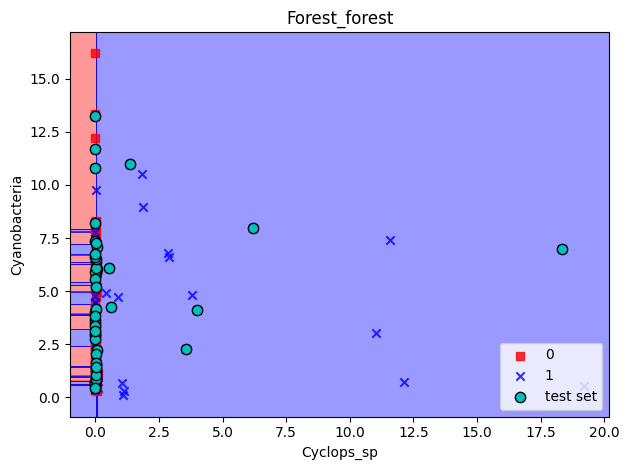

In [30]:
plot_decision_regions(Z_forest_combined,
                      y_forest_combined,
                      classifier=forest_forest,
                      test_idx=range(y_forest_train.shape[0],
                                     y_forest_train.shape[0] + y_forest_test.shape[0]))
plt.title('Forest_forest')
plt.xlabel('Cyclops_sp')
plt.ylabel('Cyanobacteria')
plt.legend(loc='lower right')
plt.tight_layout()

plt.show()

# ZADANIE

In [107]:
df = pd.read_csv('../csvki/VLagun_Total_Basins_DT.csv')

In [108]:
display(df.head())

,PSU,O2,temp.,SS,SRP,DOP,PP,NH4N,NO3N,DON,...,Acartia tonsa,Eurytemora affinis,Cyclops sp.,Nauplii Cyclopoida,Nauplii Calanoida,Filinia longiseta,Keratella cochlearis cochlearis,Keratella cochlearis f.tecta,Keratella quadrata,Basin
0,3.757624,9.46,18.3,52.0,3.5,11.7,185.0,0.039,0.022,0.551,...,0.9298,0.9251,0.0000,0.0025,0.0257,1.3152,0.8920,0.2714,0.0000,Eastern
1,3.504707,9.89,19.1,50.0,4.4,17.5,111.3,0.020,0.025,0.123,...,0.0378,0.0000,0.0000,0.0000,0.0000,0.0769,0.0640,0.0464,0.0000,Eastern
2,3.721493,9.63,17.5,62.0,11.7,13.0,117.6,0.036,0.021,0.727,...,0.0000,0.0000,0.0093,0.0138,0.0006,0.0466,0.0120,0.0044,0.0000,Eastern
3,4.407982,9.54,18.4,55.0,7.4,16.2,124.7,0.023,0.024,0.566,...,0.0000,0.0129,0.0060,0.0140,0.0155,0.0313,0.0079,0.0040,0.0000,Eastern
4,4.389916,9.34,17.8,53.0,13.8,21.4,84.4,0.031,0.030,0.022,...,0.0000,0.0141,0.0000,0.0093,0.0007,0.0491,0.0143,0.0019,0.0026,Eastern


In [109]:
df.Basin = [1 if i == "Western" else 0 for i in df.Basin]

In [110]:
display(df.head())

,PSU,O2,temp.,SS,SRP,DOP,PP,NH4N,NO3N,DON,...,Acartia tonsa,Eurytemora affinis,Cyclops sp.,Nauplii Cyclopoida,Nauplii Calanoida,Filinia longiseta,Keratella cochlearis cochlearis,Keratella cochlearis f.tecta,Keratella quadrata,Basin
0,3.757624,9.46,18.3,52.0,3.5,11.7,185.0,0.039,0.022,0.551,...,0.9298,0.9251,0.0000,0.0025,0.0257,1.3152,0.8920,0.2714,0.0000,0
1,3.504707,9.89,19.1,50.0,4.4,17.5,111.3,0.020,0.025,0.123,...,0.0378,0.0000,0.0000,0.0000,0.0000,0.0769,0.0640,0.0464,0.0000,0
2,3.721493,9.63,17.5,62.0,11.7,13.0,117.6,0.036,0.021,0.727,...,0.0000,0.0000,0.0093,0.0138,0.0006,0.0466,0.0120,0.0044,0.0000,0
3,4.407982,9.54,18.4,55.0,7.4,16.2,124.7,0.023,0.024,0.566,...,0.0000,0.0129,0.0060,0.0140,0.0155,0.0313,0.0079,0.0040,0.0000,0
4,4.389916,9.34,17.8,53.0,13.8,21.4,84.4,0.031,0.030,0.022,...,0.0000,0.0141,0.0000,0.0093,0.0007,0.0491,0.0143,0.0019,0.0026,0


In [111]:
X = df.drop("Basin", axis=1)
y = df["Basin"]

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print('#Training data points: %d' % X_train.shape[0])
print('#Testing data points: %d' % X_test.shape[0])
print('Class:', np.unique(y))

#Training data points: 108
#Testing data points: 47
Class: [0 1]


In [113]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5, random_state=0)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Test dataset Accuracy (tree): %.2f' % ((y_test == y_pred).sum() / y_test.shape[0]))

Misclassified samples: 13
Test dataset Accuracy (tree): 0.72


In [114]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5, random_state=0)

tree.fit(X_train, y_train)

y_pred = tree.predict(X_train)
print('Misclassified samples: %d' % (y_train != y_pred).sum())
print('Train dataset Accuracy (tree): %.2f' % ((y_train == y_pred).sum() / y_train.shape[0]))

Misclassified samples: 21
Train dataset Accuracy (tree): 0.81


In [115]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree,
    out_file='tree3.dot',
    feature_names=X.columns.values
)

In [116]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=200,
                                random_state=1,
                                n_jobs=2)

forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, n_jobs=2,
                       random_state=1)

In [117]:
from sklearn.metrics import accuracy_score

y_pred = forest.predict(X_test)
print('Test dataset Accuracy (forest): %.4f' % accuracy_score(y_test, y_pred))

Test dataset Accuracy (forest): 0.7660


In [118]:
y_pred = forest.predict(X_train)
print('Train dataset Accuracy (forest): %.4f' % accuracy_score(y_train, y_pred))

Train dataset Accuracy (forest): 1.0000


In [119]:
import numpy as np
import matplotlib.pyplot as plt 
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 20, 
                            X.columns.values[indices[f]],
                            importances[indices[f]]))

 1) Nauplii Cyclopoida   0.087723
 2) Cyclops sp.          0.072056
 3) Depth                0.068339
 4) DON                  0.053796
 5) PSU                  0.042186
 6) DOP                  0.037714
 7) O2                   0.036068
 8) DOC                  0.035916
 9) Cyanobacteria        0.031511
10) Acartia tonsa        0.029091
11) TN/TP                0.027812
12) Keratella cochlearis cochlearis 0.027801
13) temp.                0.027305
14) SS                   0.026483
15) PP                   0.024106
16) SRP                  0.023878
17) PN                   0.023749
18) Diatomophyceae       0.023105
19) Chlorophyceae        0.022410
20) picophytoplankton    0.021967
21) Keratella cochlearis f.tecta 0.021755
22) TPOC                 0.021634
23) SiO4Si               0.021333
24) Filinia longiseta    0.020858
25) NH4N                 0.020450
26) NO3N                 0.020062
27) Diaphanosoma brachyurum 0.018839
28) Flagellata           0.017923
29) Fe                   0

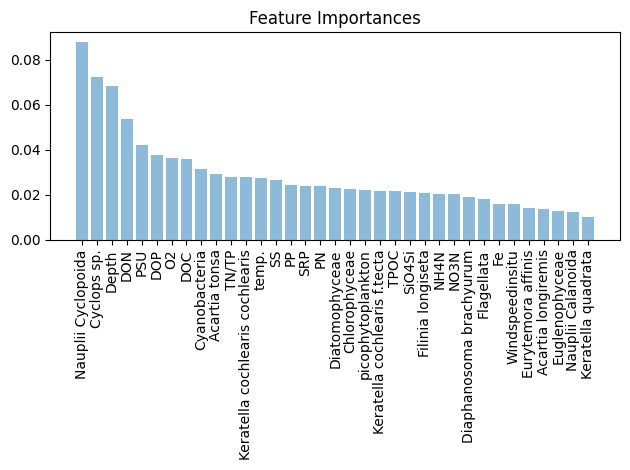

In [120]:
plt.figure()
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center', 
        alpha=0.5)

plt.xticks(range(X_train.shape[1]),
           X.columns.values[indices], rotation=90)
plt.tight_layout()
plt.savefig('C:/Users/sulgard/WBD/fig-forest.png', dpi=300)
plt.show()

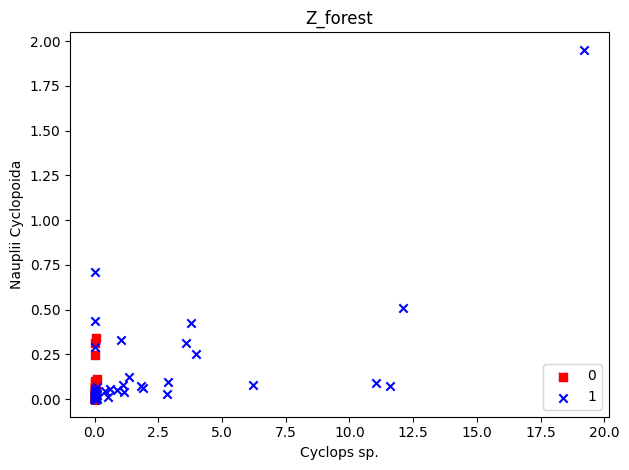

In [121]:
import matplotlib.pyplot as plt

Z_forest = X[['Cyclops sp.', 'Nauplii Cyclopoida']].values

colors =  ['r', 'b', 'g', 'k']
makers = ['s', 'x', 'o', '^']

for l, c, m in zip(np.unique(y.values), colors, makers):
    plt.scatter(Z_forest[y.values==l, 0],
                Z_forest[y.values==l, 1],
                c=c, label=l, marker=m)

plt.title('Z_forest')
plt.xlabel('Cyclops sp.')
plt.ylabel('Nauplii Cyclopoida')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('C:/Users/sulgard/WBD/fig-forest-z2.png', dpi=300)
plt.show()

In [122]:
Z_forest_train, Z_forest_test, y_forest_train, y_forest_test = train_test_split(
    Z_forest, y, test_size=0.3, random_state=0)

tree_forest = DecisionTreeClassifier(criterion='entropy',
                                     max_depth=10, min_samples_leaf=5,
                                     random_state=0)
tree_forest.fit(Z_forest_train, y_forest_train)

y_forest_pred = tree_forest.predict(Z_forest_test)
print('Test dataset Accuracy (tree_forest): %.2f' % accuracy_score(y_forest_test, y_forest_pred))

Test dataset Accuracy (tree_forest): 0.68


## 1.a) Dokładność wszystkich zmiennych modelu DT. (Decision tree – drzewa decyzyjne)

In [123]:
Z_forest_train, Z_forest_test, y_forest_train, y_forest_test = train_test_split(
    Z_forest, y, test_size=0.3, random_state=0)

tree_forest = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                                     random_state=0)

tree_forest.fit(Z_forest_train, y_forest_train)
y_forest_pred = tree_forest.predict(Z_forest_test)
print('Train dataset Accuracy (tree_forest): %.2f' % accuracy_score(y_forest_test, y_forest_pred))

Train dataset Accuracy (tree_forest): 0.68


In [124]:
Z_forest_train, Z_forest_test, y_forest_train, y_forest_test = train_test_split(
    Z_forest, y, test_size=0.3, random_state=0)

tree_forest = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                                     random_state=0)

tree_forest.fit(Z_forest_train, y_forest_train)
y_forest_pred = tree_forest.predict(Z_forest_train)
print('Train dataset Accuracy (tree_forest): %.2f' % accuracy_score(y_forest_train, y_forest_pred))

Train dataset Accuracy (tree_forest): 0.80


In [125]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(forest, threshold=0.05, prefit=True)
Z_forest_alt = sfm.transform(X)

for f in range(Z_forest_alt.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            X.columns.values[indices[f]],
                            importances[indices[f]]))

 1) Nauplii Cyclopoida             0.087723
 2) Cyclops sp.                    0.072056
 3) Depth                          0.068339
 4) DON                            0.053796


C:\Users\sulgard\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


## 1.b) Dokładność wszystkich zmiennych modelu RF (Random forest – lasy losowe)

In [126]:
forest_forest = RandomForestClassifier(criterion='entropy',
                                       n_estimators=200,
                                       random_state=1,
                                       n_jobs=2)
forest_forest.fit(Z_forest_train, y_forest_train)

y_forest_pred = forest_forest.predict(Z_forest_test)
print('Test dataset Accuracy (forest_forest): %.2f' % accuracy_score(y_forest_test, y_forest_pred))

Test dataset Accuracy (forest_forest): 0.72


In [127]:
forest_forest = RandomForestClassifier(criterion='entropy',
                                       n_estimators=200,
                                       random_state=1,
                                       n_jobs=2)
forest_forest.fit(Z_forest_train, y_forest_train)

y_forest_pred = forest_forest.predict(Z_forest_train)
print('Train dataset Accuracy (forest_forest): %.4f' % accuracy_score(y_forest_train, y_forest_pred))

Train dataset Accuracy (forest_forest): 0.9815


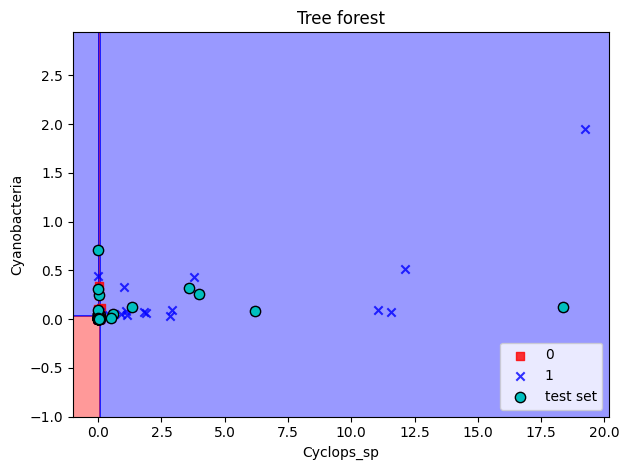

In [128]:
Z_forest_combined = np.vstack((Z_forest_train, Z_forest_test))
y_forest_combined = np.hstack((y_forest_train, y_forest_test))
plot_decision_regions(
    Z_forest_combined,
    y_forest_combined,
    classifier = tree_forest,
    test_idx = range(
        y_forest_train.shape[0],
        y_forest_train.shape[0] + y_forest_test.shape[0]
    )
)

plt.title('Tree forest')
plt.xlabel('Cyclops_sp')
plt.ylabel('Cyanobacteria')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

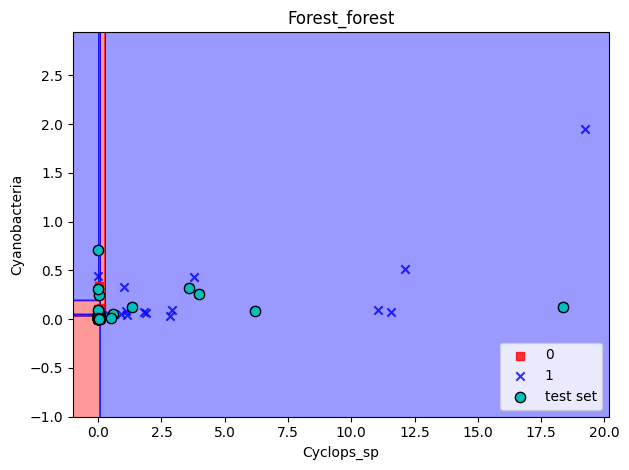

In [129]:
plot_decision_regions(Z_forest_combined,
                      y_forest_combined,
                      classifier=forest_forest,
                      test_idx=range(y_forest_train.shape[0],
                                     y_forest_train.shape[0] + y_forest_test.shape[0]))
plt.title('Forest_forest')
plt.xlabel('Cyclops_sp')
plt.ylabel('Cyanobacteria')
plt.legend(loc='lower right')
plt.tight_layout()

plt.show()

In [130]:
Z_forest = X[['Nauplii Cyclopoida', 'Cyclops sp.']].values

## 1.c) Dokładność dla dwóch najważniejszych zmiennych (Z-forest) modelu DT (forest_tree)

In [131]:
Z_forest_train, Z_forest_test, y_forest_train, y_forest_test = train_test_split(
    Z_forest, y, test_size=0.3, random_state=0)

tree_forest = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                                     random_state=0)

tree_forest.fit(Z_forest_train, y_forest_train)
y_forest_pred = tree_forest.predict(Z_forest_test)
print('Train dataset Accuracy (tree_forest): %.2f' % accuracy_score(y_forest_test, y_forest_pred))

Train dataset Accuracy (tree_forest): 0.68


## 1.d) Dokładność dla dwóch najważniejszych zmiennych (Z-forest) modelu RF (forest_forest)

In [132]:
forest_forest = RandomForestClassifier(criterion='entropy',
                                       n_estimators=200,
                                       random_state=1,
                                       n_jobs=2)
forest_forest.fit(Z_forest_train, y_forest_train)

y_forest_pred = forest_forest.predict(Z_forest_test)
print('Test dataset Accuracy (forest_forest): %.2f' % accuracy_score(y_forest_test, y_forest_pred))

Test dataset Accuracy (forest_forest): 0.72
